In [1]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
symbol = '2800.HK'
stock = yf.Ticker(symbol)
df_train = stock.history(start="2008-01-01", end="2020-12-31")
stock_data_train = df_train[['Open',  'High',  'Low',  'Close', 'Volume']]
df_test = stock.history(start="2020-12-31", end="2022-12-31")
stock_data_test = df_test[['Open',  'High',  'Low',  'Close', 'Volume']]

In [3]:
stock_data_train

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,27.730000,27.730000,27.730000,27.730000,0
2008-01-03,27.059999,27.059999,27.059999,27.059999,0
2008-01-04,27.690001,27.690001,27.690001,27.690001,0
2008-01-07,27.350000,27.350000,27.350000,27.350000,0
2008-01-08,27.280001,27.280001,27.280001,27.280001,0
...,...,...,...,...,...
2020-12-23,26.260000,26.520000,26.240000,26.520000,54078882
2020-12-24,26.600000,26.600000,26.600000,26.600000,0
2020-12-28,26.580000,26.700001,26.459999,26.480000,96582169


In [4]:
stock_data_train['Day _n-1 Price Change %'] = (stock_data_train.iloc[:,3].shift(1) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-2 Price Change %'] = (stock_data_train.iloc[:,3].shift(2) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-3 Price Change %'] = (stock_data_train.iloc[:,3].shift(3) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-4 Price Change %'] = (stock_data_train.iloc[:,3].shift(4) - stock_data_train['Close']) / stock_data_train['Close'] * 100
stock_data_train['Day _n-5 Price Change %'] = (stock_data_train.iloc[:,3].shift(5) - stock_data_train['Close']) / stock_data_train['Close'] * 100

stock_data_train['Next Price'] = stock_data_train.iloc[:,3].shift(-1)
stock_data_train['Next Price Change %'] = (stock_data_train['Next Price'] - stock_data_train['Close']) / stock_data_train['Close'] * 100

stock_data_test['Day _n-1 Price Change %'] = (stock_data_test.iloc[:,3].shift(1) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-2 Price Change %'] = (stock_data_test.iloc[:,3].shift(2) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-3 Price Change %'] = (stock_data_test.iloc[:,3].shift(3) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-4 Price Change %'] = (stock_data_test.iloc[:,3].shift(4) - stock_data_test['Close']) / stock_data_test['Close'] * 100
stock_data_test['Day _n-5 Price Change %'] = (stock_data_test.iloc[:,3].shift(5) - stock_data_test['Close']) / stock_data_test['Close'] * 100

stock_data_test['Next Price'] = stock_data_test.iloc[:,3].shift(-1)
stock_data_test['Next Price Change %'] = (stock_data_test['Next Price'] - stock_data_test['Close']) / stock_data_test['Close'] * 100

/var/folders/k1/lgkdwmq55l119cbpwpd05dy00000gn/T/ipykernel_4404/3822148608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_train['Day _n-1 Price Change %'] = (stock_data_train.iloc[:,3].shift(1) - stock_data_train['Close']) / stock_data_train['Close'] * 100
/var/folders/k1/lgkdwmq55l119cbpwpd05dy00000gn/T/ipykernel_4404/3822148608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_test['Day _n-1 Price Change %'] = (stock_data_test.iloc[:,3].shift(1) - stock_data_test['Close']) / 

In [8]:
stock_data_train

,Open,High,Low,Close,Volume,Day _n-1 Price Change %,Day _n-2 Price Change %,Day _n-3 Price Change %,Day _n-4 Price Change %,Day _n-5 Price Change %,Next Price,Next Price Change %
Date,,,,,,,,,,,,
2008-01-02,27.730000,27.730000,27.730000,27.730000,0,NaN,NaN,NaN,NaN,NaN,27.059999,-2.416156
2008-01-03,27.059999,27.059999,27.059999,27.059999,0,2.475980,NaN,NaN,NaN,NaN,27.690001,2.328164
2008-01-04,27.690001,27.690001,27.690001,27.690001,0,-2.275193,0.144453,NaN,NaN,NaN,27.350000,-1.227881
2008-01-07,27.350000,27.350000,27.350000,27.350000,0,1.243145,-1.060332,1.389394,NaN,NaN,27.280001,-0.255940
2008-01-08,27.280001,27.280001,27.280001,27.280001,0,0.256597,1.502932,-0.806456,1.649556,NaN,27.780001,1.832845
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,26.260000,26.520000,26.240000,26.520000,54078882,-0.829567,-0.226250,0.301659,1.282052,0.603318,26.600000,0.301659
2020-12-24,26.600000,26.600000,26.600000,26.600000,0,-0.300752,-1.127824,-0.526321,0.000000,0.977444,26.480000,-0.451131
2020-12-28,26.580000,26.700001,26.459999,26.480000,96582169,0.453175,0.151061,-0.679759,-0.075530,0.453175,26.740000,0.981874


In [5]:
train_data_LR = stock_data_train[['Close', 'Day _n-1 Price Change %', 'Day _n-2 Price Change %', 'Day _n-3 Price Change %', 'Day _n-4 Price Change %', 'Day _n-5 Price Change %', 'Next Price Change %']]
#train_data_LR = stock_data_train[['Day _n-1 Price Change %', 'Day _n-2 Price Change %', 'Day _n-3 Price Change %', 'Day _n-4 Price Change %', 'Day _n-5 Price Change %', 'Next Price Change %']]
train_data_LR = train_data_LR.drop(train_data_LR.index[-1])
train_data_LR = train_data_LR.drop(train_data_LR.index[0:5])

test_data_LR = stock_data_test[['Close', 'Day _n-1 Price Change %', 'Day _n-2 Price Change %', 'Day _n-3 Price Change %', 'Day _n-4 Price Change %', 'Day _n-5 Price Change %', 'Next Price Change %']]
#test_data_LR = stock_data_test[['Day _n-1 Price Change %', 'Day _n-2 Price Change %', 'Day _n-3 Price Change %', 'Day _n-4 Price Change %', 'Day _n-5 Price Change %', 'Next Price Change %']]
test_data_LR = test_data_LR.drop(test_data_LR.index[-1])
test_data_LR = test_data_LR.drop(test_data_LR.index[0:5])

In [73]:
# scaler = preprocessing.MinMaxScaler()
# scaled_values = scaler.fit_transform(train_data_LR.iloc[:,:])
# train_data_LR.iloc[:,:] = scaled_values

In [6]:
train_data_LR

,Close,Day _n-1 Price Change %,Day _n-2 Price Change %,Day _n-3 Price Change %,Day _n-4 Price Change %,Day _n-5 Price Change %,Next Price Change %
Date,,,,,,,
2008-01-09,27.780001,-1.799856,-1.547877,-0.323975,-2.591797,-0.179990,-1.367894
2008-01-10,27.400000,1.386865,-0.437952,-0.182479,1.058398,-1.240876,-1.350361
2008-01-11,27.030001,1.368845,2.774695,0.924898,1.183869,2.441731,-1.479843
2008-01-14,26.629999,1.502071,2.891478,4.318444,2.440862,2.703722,-2.365750
2008-01-15,26.000000,2.423074,3.961541,5.384614,6.846156,4.923080,-5.346151
...,...,...,...,...,...,...,...
2020-12-22,26.299999,0.608364,1.140689,2.129283,1.444871,0.380230,0.836507
2020-12-23,26.520000,-0.829567,-0.226250,0.301659,1.282052,0.603318,0.301659
2020-12-24,26.600000,-0.300752,-1.127824,-0.526321,0.000000,0.977444,-0.451131


In [7]:
y_train = train_data_LR['Next Price Change %'].to_numpy()
x_train = train_data_LR.drop('Next Price Change %', axis=1).to_numpy()

y_test = test_data_LR['Next Price Change %'].to_numpy()
x_test = test_data_LR.drop('Next Price Change %', axis=1).to_numpy()

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
score = model.score(x_test, y_test)
print(score)

-0.00903947858122911


In [11]:
score = model.score(x_train, y_train)
print(score)

0.008545090813243172


In [12]:
y_predict = np.zeros(y_test.size)

for i in range(np.size(x_test, 0)):
    y_predict[i] = model.predict([x_test[i]])

In [13]:
mean_squared_error(y_test, y_predict)

2.2932900024987797

In [14]:
stock_price = test_data_LR['Close'].to_numpy()
predicted_stock_price = stock_price *(1 + y_predict/100)
real_stock_price = stock_price *(1 + y_test/100)

In [40]:
real_price = []
pred_price = []
cnt=0
for i,j, k in zip(y_test, y_predict, stock_price):
    real_price.append(k*(1+i/100))
    pred_price.append(k*(1+j/100))

# MSE between actual price and the predicted price

In [43]:
mean_squared_error(real_price, pred_price)

0.14293683365082954

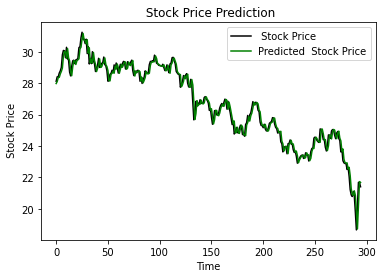

In [42]:
plt.plot(real_price, color = 'black', label = ' Stock Price')
plt.plot(pred_price, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()